### <font color='blue'>固有表現認識</font>

固有表現認識は組織や人物、日付といった特定の種類の何かを指す定名詞句である。<br>

以下に固有表現でよく利用される種類について記述する。<br>

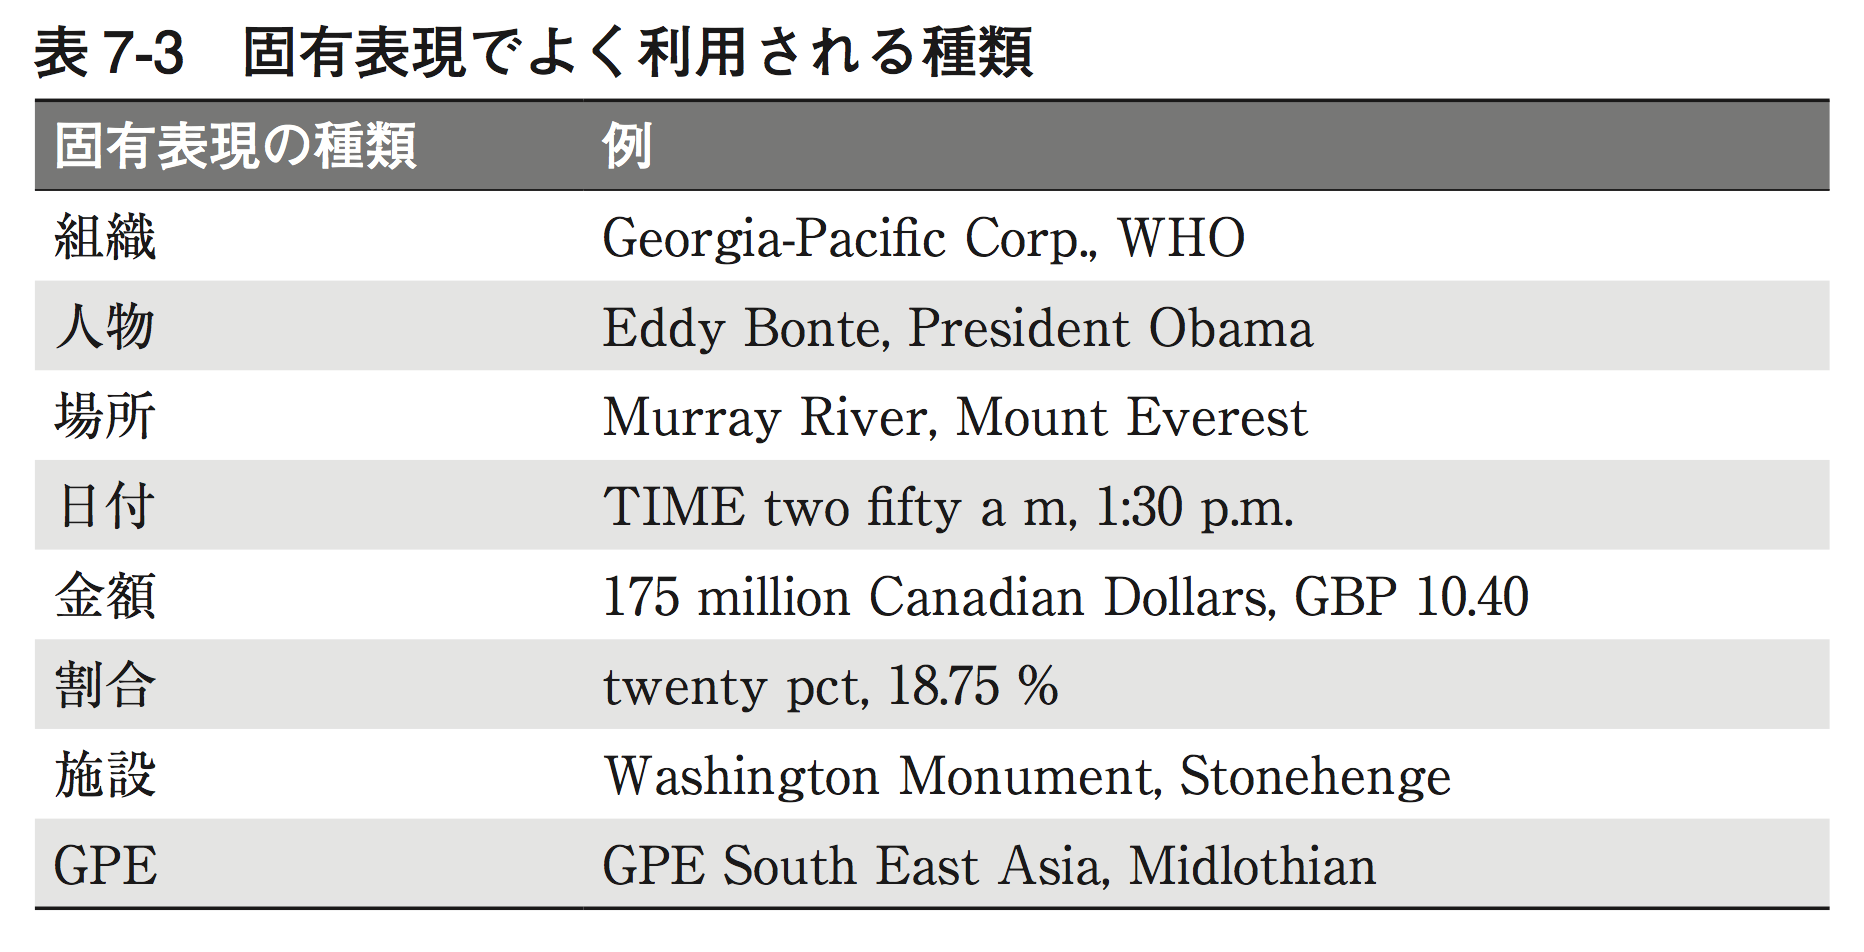

In [1]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/7-12.png', width=600)

固有表現認識(NER)システムの目標は、文章中で言及されている全ての固有表現を特定することである。<br>

上記については２つのサブタスクに分けることができる。<br>
<ul>
<li>固有表現の境界を特定すること</li>
<li>そのタイプを識別すること</li>
</ul>

固有表現認識については情報抽出における関係認識のとっかかりとなることが多い。<br>
しかし、それ以外のタスクにも利用できる。<br>

例として、質問応答(QA)があげられる。<br>
いかに質問応答への利用例を記述する。<br>

ほとんどのQAシステムでは、まずは一般的な情報検索を利用して文書を取得。<br>
それから文書の中から回答を含む最小のテキスト断片を抽出する。<br>

質問が「Who was the first President of the U.S?」であったとき以下の文が取得される。<br>

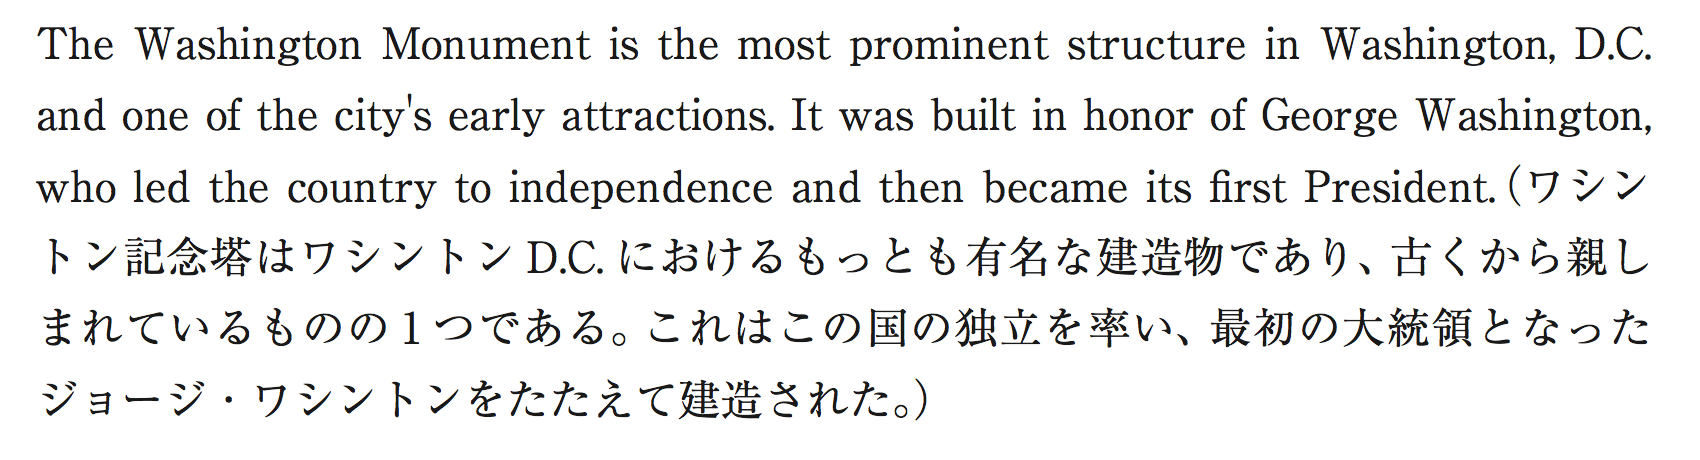

In [2]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/7-13.png', width=600)

回答は「アメリカ合衆国の初代大統領はXでした」というもので<br>
「X」が名詞句あるいはPERに分類されることが予想可能。<br>
したがって、最初の文に「Washington」が出現するが、これは正しい答えではないということがわかる。<br>

では、固有表現の識別はどのようにおこなうのだろうか。<br>
場所情報の場合は、Alexandria GazetterやGetty Gazetterなどの地名辞典を用いることができる。<br>
しかし、上記を単純に用いるだけであると以下のような問題を起こす。<br>

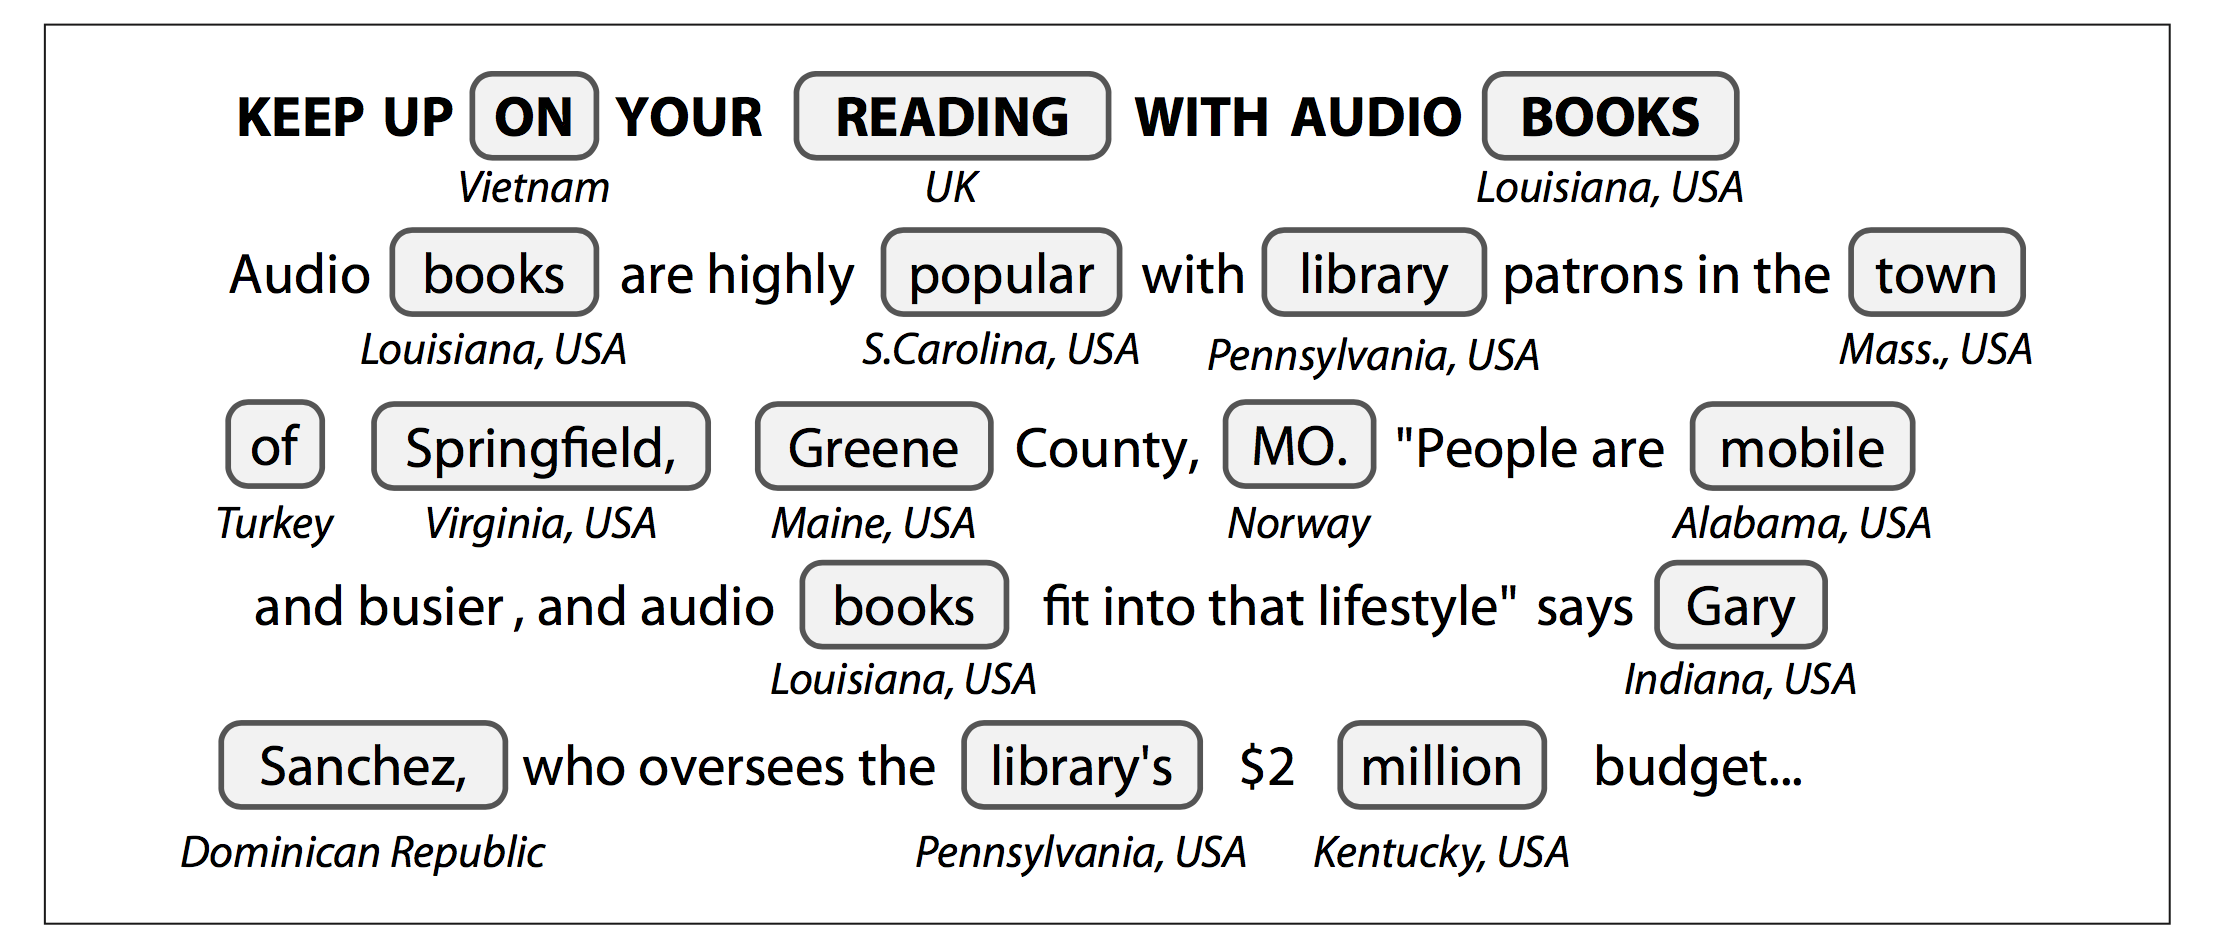

In [3]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/7-14.png', width=600)

上記のように辞典から固有表現認識を行うことは難しいことがわかる。<br>

固有表現認識は名詞句チャンキングの際にみた、分類器ベースのアプローチがより適している。<br>

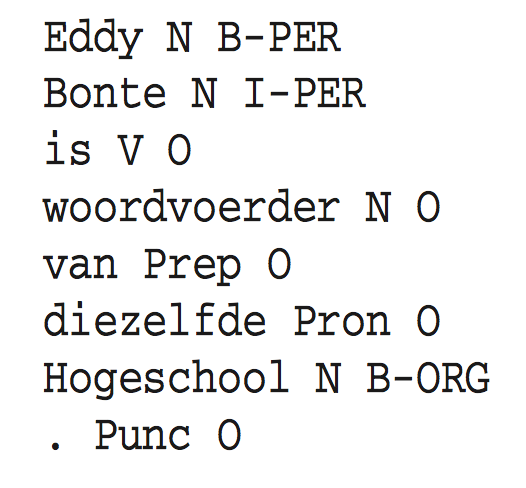

In [4]:
# 画像の表示
from IPython.display import Image
Image(filename='IMG/7-15.png', width=200)

上記は１行に１つのトークン、その品詞タグ、固有表現タグが記されている。<br>

nltkでは固有表現認識の訓練を行なっている分類器を提供している。<br>

In [5]:
import nltk

sent = nltk.corpus.treebank.tagged_sents()[22]

In [6]:
print(nltk.ne_chunk(sent, binary=True))

(S
  The/DT
  (NE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (NE Brooke/NNP)
  T./NNP
  Mossman/NNP
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (NE University/NNP)
  of/IN
  (NE Vermont/NNP College/NNP)
  of/IN
  (NE Medicine/NNP)
  ./.)


In [7]:
print(nltk.ne_chunk(sent)) 

(S
  The/DT
  (GPE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (PERSON Brooke/NNP T./NNP Mossman/NNP)
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (PERSON Vermont/NNP College/NNP)
  of/IN
  (GPE Medicine/NNP)
  ./.)


上記から、ne_chunkに引数binary=Trueを指定した場合、固有表現はNEとしてタグ付け。<br>
binary=Trueを引数に指定していない場合、分類器はPERSON, ORGANIZATION, GPEというカテゴリラベルを追加。<br>

### <font color='blue'>関係抽出</font>

テキスト中の固有表現が特定されたら、続いてそれらの間に存在する関係を抽出する。<br>
固有表現に関するタスクでは、特定のタイプの固有表現間の関係を調べていることが多い。<br>

したがって、アプローチの１つとして、初めに(X, α, Y)というタプルを全て探し出す。<br>
ここでXとYは指定されたタイプの固有表現を、αはXとYの間にある単語文字列を指す。<br>

以下の例では「in」という単語を含む文字列だけを検索している。<br>

In [8]:
import re

IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']
